In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1

## read csv

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cadata.txt', sep='\s+', skiprows=27, names=['MedianHouseValue', 'MedianIncome', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households', 'Latitude', 'Longitude'], encoding_errors="replace")
dataset.head()
dataset.columns

print(dataset.head())
print('list of columns name:', dataset.columns)
print('number of lines:', len(dataset))


   MedianHouseValue  MedianIncome  HousingMedianAge  TotalRooms  \
0          452600.0        8.3252              41.0       880.0   
1          358500.0        8.3014              21.0      7099.0   
2          352100.0        7.2574              52.0      1467.0   
3          341300.0        5.6431              52.0      1274.0   
4          342200.0        3.8462              52.0      1627.0   

   TotalBedrooms  Population  Households  Latitude  Longitude  
0          129.0       322.0       126.0     37.88    -122.23  
1         1106.0      2401.0      1138.0     37.86    -122.22  
2          190.0       496.0       177.0     37.85    -122.24  
3          235.0       558.0       219.0     37.85    -122.25  
4          280.0       565.0       259.0     37.85    -122.25  
list of columns name: Index(['MedianHouseValue', 'MedianIncome', 'HousingMedianAge', 'TotalRooms',
       'TotalBedrooms', 'Population', 'Households', 'Latitude', 'Longitude'],
      dtype='object')
number of line

##Part 1.2 Plot histogram(median house value)

Text(0, 0.5, 'Frequency')

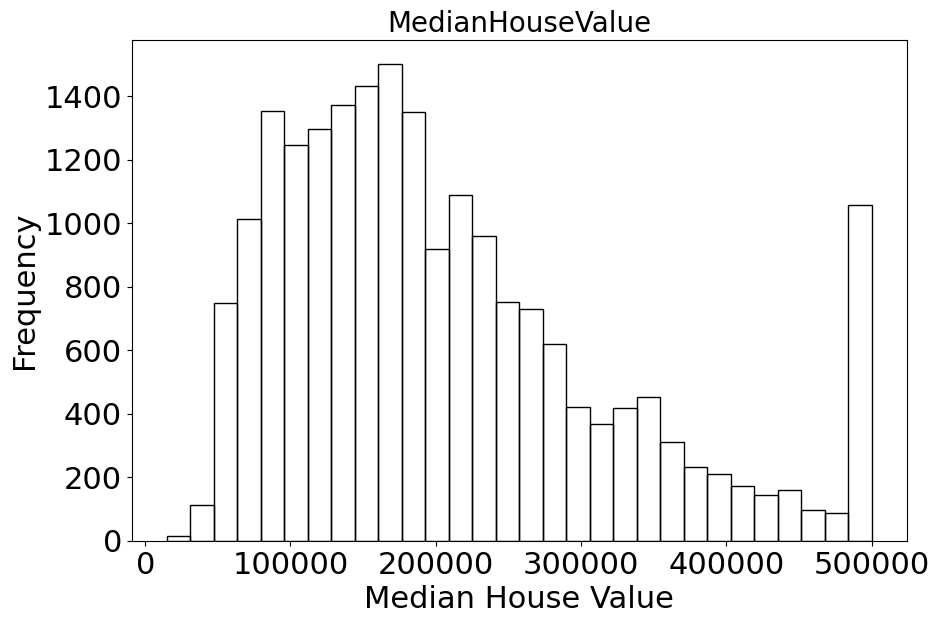

In [3]:
#np.random.seed(5)
#sklearn_dataset = sklearn.datasets.fetch_california_housing()

#dataset_missing = dataset.copy()
#mhv = pd.array(dataset['median_house_value'])
#mhv[np.random.choice(range(len(dataset)), 3*len(dataset)//4, replace =False)]= np.nan
#dataset_missing['median_house_value'] = mhv
#print('missing counts', dataset_missing.isna().sum())
#print('dataset_missing', dataset_missing)


import matplotlib.pyplot as plt

figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(figsize=figsize)
ax.hist(dataset['MedianHouseValue'], bins=30, fill=False)
ax.set_title('MedianHouseValue', fontsize = 20)
ax.set_xlabel('Median House Value')
ax.set_ylabel('Frequency')


I think the unit of this column is dollar since it represent the price of house. Based on the histogram, most of data clustered between 100000 to 250000 approximatly. Also, there are some data grouped at 500000 as well, so it's not normal distribution. In this case bar around 500000 is a outlier which influence the smoothness of a distribution

## Part 1.4  Scatter Plots

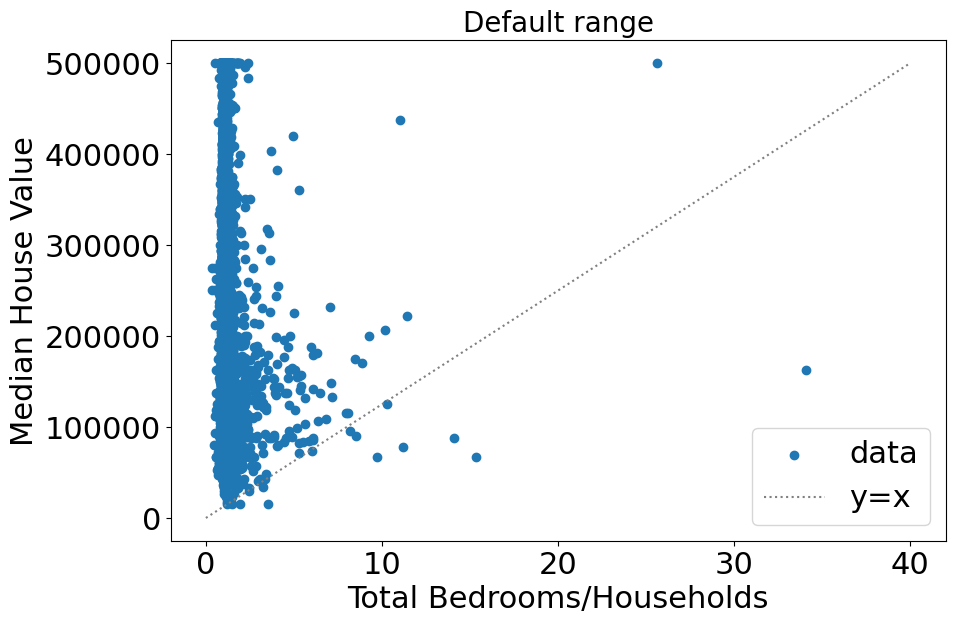

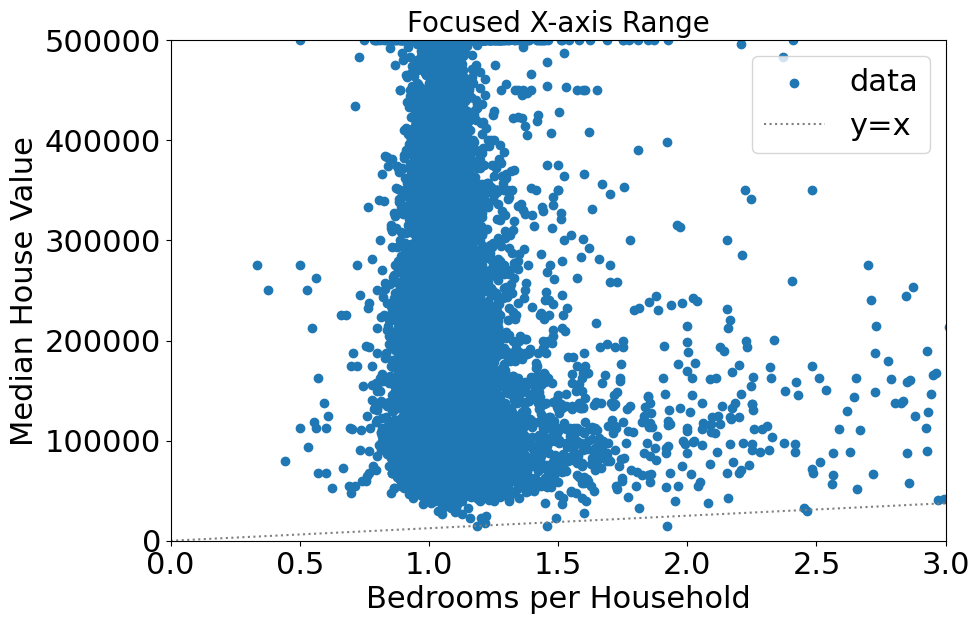

In [4]:
#Default
fig, ax = plt.subplots(figsize=figsize)
bedrooms_per_household = dataset['TotalBedrooms'] / dataset['Households']  # Corrected variable names
ax.scatter(bedrooms_per_household, dataset['MedianHouseValue'], label='data')
ax.plot([0, 40], [0, 500000], ':', color='grey', label='y=x')
ax.set_xlabel('Total Bedrooms/Households')
ax.set_ylabel('Median House Value')
ax.set_title('Default range', size=20)
ax.legend()
fig.show()
#Focus x-axis
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(bedrooms_per_household, dataset['MedianHouseValue'], label='data')
# Adjust y=x line for focused range
ax.plot([0, 40], [0, 500000], ':', color='grey', label='y=x')
ax.set_xlim(0, 3)
ax.set_ylim(0, 500000)
ax.set_xlabel('Bedrooms per Household')
ax.set_ylabel('Median House Value')
ax.set_title('Focused X-axis Range', size=20)
ax.legend()
fig.show()


### I did not see a strong relationship between bedrooms per household and mediam house value. Based on two scatter plots, majority of house have 1 to 2 bedrooms per household. The median house value is the median of price of house in california. Based on the plot focused on x-axis, most houses that are 100000 to 200000 dollars have about 1 to 1.5 bedrooms. I don't think the value is resonable becuase there are few outliers. The house have 500000 median house value have 35 bedrooms, which is an outlier. There are also house with lower price have more than 30 bedrooms. To my understanding, I think total number of bedrooms means number of bedrooms in a house.

## Part 1.5 3 scatter plots

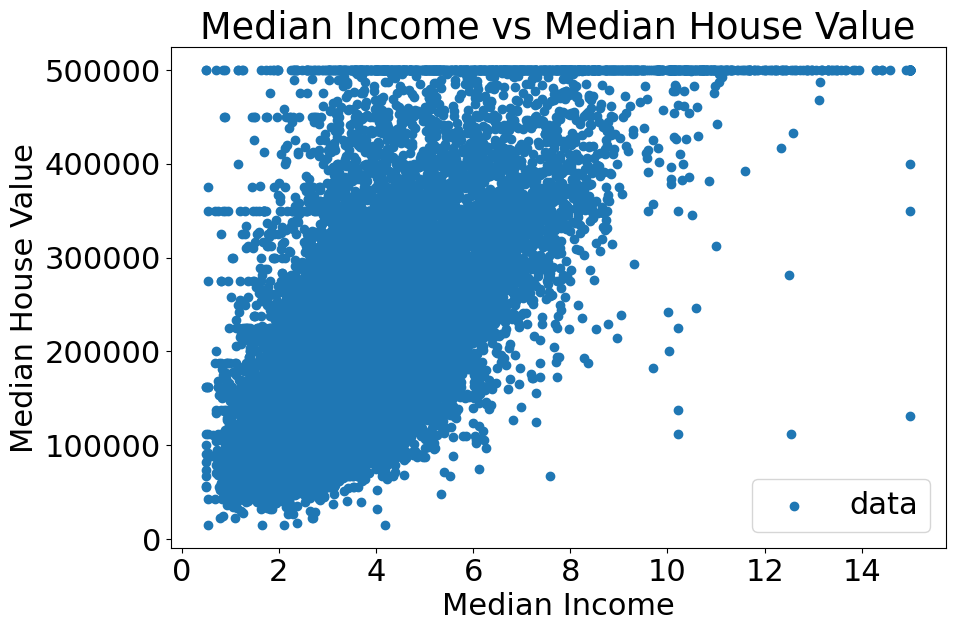

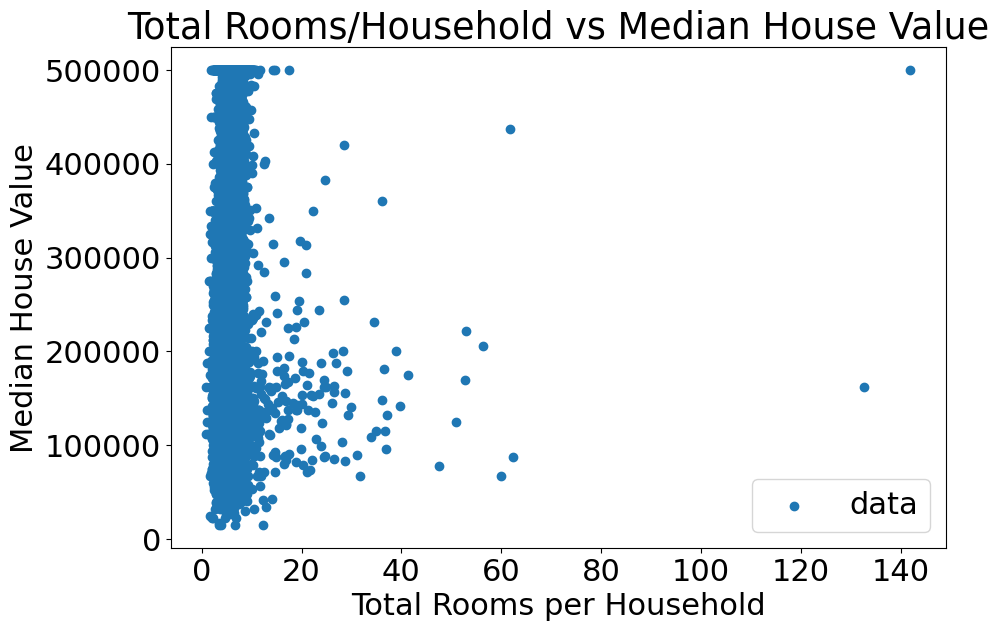

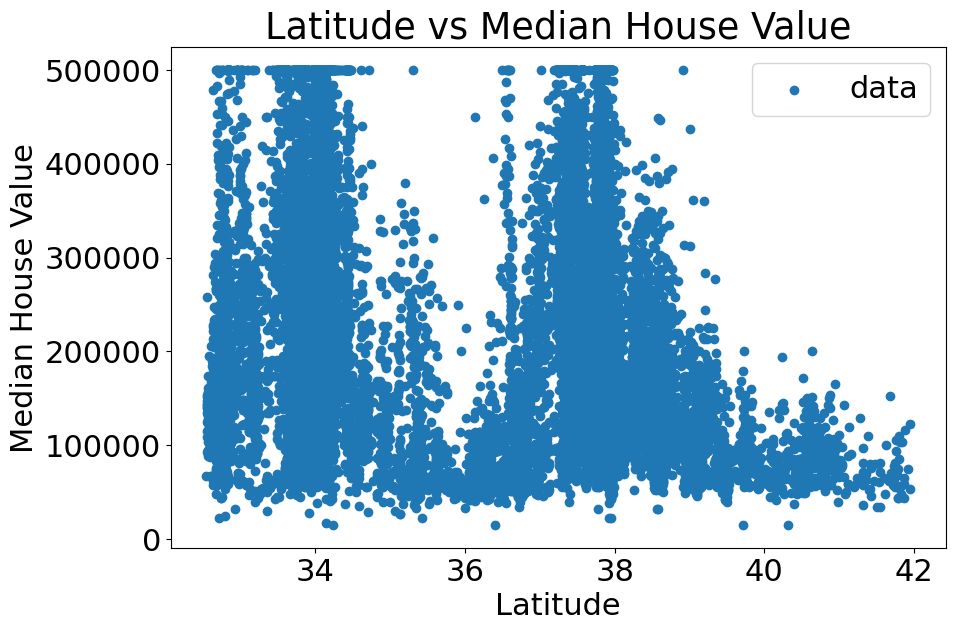

In [5]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(dataset['MedianIncome'], dataset['MedianHouseValue'], label='data')
ax.set_xlabel('Median Income')
ax.set_ylabel('Median House Value')
ax.set_title('Median Income vs Median House Value')
ax.legend()
fig.show()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(dataset['TotalRooms'] / dataset['Households'], dataset['MedianHouseValue'], label='data')
ax.set_xlabel('Total Rooms per Household')
ax.set_ylabel('Median House Value')
ax.set_title('Total Rooms/Household vs Median House Value')
ax.legend()
fig.show()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(dataset['Latitude'], dataset['MedianHouseValue'], label='data')
ax.set_xlabel('Latitude')
ax.set_ylabel('Median House Value')
ax.set_title('Latitude vs Median House Value')
ax.legend()
fig.show()

The first scatter plot show the relationship between the median income and median house value. The plot did shows that there is a positive correlation between median incom and median house value. Median house value increase as median income increases. But there are some outliers that higher income but lower median house value.
The second scatter plot show the relationship between the total rooms per householda and median house value. There is no strong relationship between the total rooms per households and median house value. Majority of data cluster at the left side of the plot. It didn't show that house with more bedrooms have higher price.
The third scatter plot shows the relationship between latitude and median house value. There are data clustered at certain latitude which shows relationship between latitude and median house value. There is a group of data cluster at latitue 33-35, and latitude 37-39 approximatly. As latitude increase, the price of house decerase.

# Part 2

## Part 2.1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Part 2.2 read csv/index=0

In [7]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_sample_data_onehot.csv', index_col=0)
d.head()
d.columns

print(d.head())
print('list of columns name:', d.columns)
print('number of lines:', len(d))

   weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
0   0.003776         199.132337  285.580952          0          0          1
1   0.008966         193.617089  303.793877          0          0          1
2   0.003654         109.604169  364.958930          1          0          0
3   0.009349         249.698449  361.290959          0          0          1
4   0.005907         125.443557  231.345769          0          1          0
list of columns name: Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')
number of lines: 300


## Part 2.3 Train/Split

In [8]:
np.random.seed(5)
from sklearn.model_selection import train_test_split
fit_data, test_data = train_test_split(d, test_size=0.25)
print('fit data size:', len(fit_data))
print('Testing data size:', len(test_data))

fit data size: 225
Testing data size: 75


## Part 2.4 & 2.5

### fitting

linear regression score
fitting data score: 0.9299773285877417
testing data score: 0.9100832065669706
ridge regression score
fitting data score: 0.7288847483823705
testing data score: 0.6498012509681663


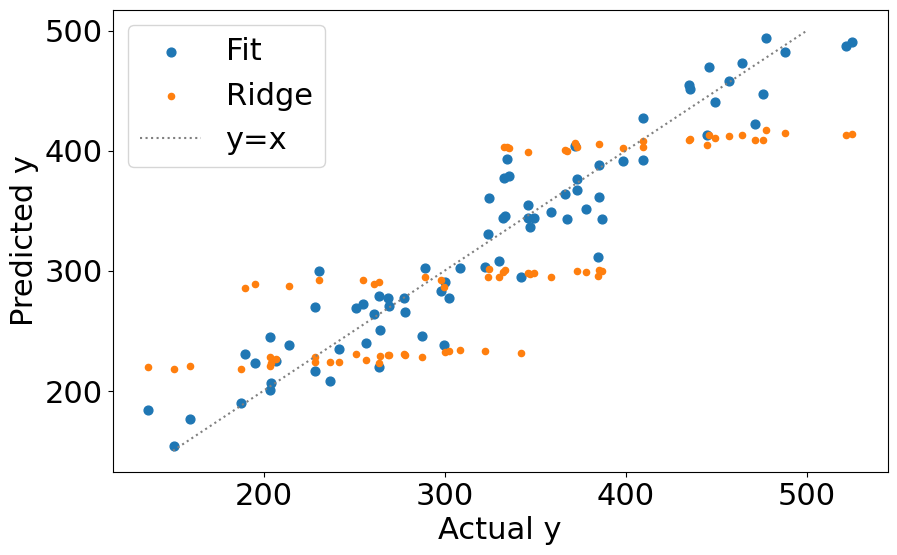

In [9]:
from sklearn.linear_model import LinearRegression, Ridge
# 2.4
m = LinearRegression()
rm = Ridge(0.01)

fit_data_features = fit_data.drop('avg_rating', axis=1)
fit_data_target = fit_data['avg_rating']

test_data_features = test_data.drop('avg_rating', axis=1)
test_data_target = test_data['avg_rating']

m.fit(fit_data_features, fit_data_target)
rm.fit(fit_data_features, fit_data_target)

# 2.5 scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(test_data_target, m.predict(test_data_features), s=40, label='Fit')
ax.scatter(test_data_target, rm.predict(test_data_features), s=20, label='Ridge')
ax.plot([150,500],[150,500],':', color = 'grey', label='y=x')
ax.set_xlabel('Actual y')
ax.set_ylabel ( 'Predicted y')
ax. legend ()
fig. show()

print('linear regression score')
print('fitting data score:', m.score(fit_data_features, fit_data_target))
print('testing data score:', m.score(test_data_features, test_data_target))
print('ridge regression score')
print('fitting data score:', rm.score(fit_data_features, fit_data_target))
print('testing data score:', rm.score(test_data_features, test_data_target))

All data points will clustered at the y=x line if the plot is a perfect fit. For linear regression, I would say it's a good fit because all datas are around the fit line, and the score for both pitting and testing data are around 0.9 which could be considered as a high score. However, for rigde model, the data doesn't fit. Datas are scattered. Score for fitting data is 0.7 and score for testing data is 0.6 which won't match. Also, 0.7 and 0.6 is a low score.

linear regression model hebave sensibly becuase data points are close to the y=x line.
Ridge model doesn't behave sensibly beucase datapoint are scattered and flat.

## Part 2.6 pipeline

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#linear regression
pipeline_lr = make_pipeline(StandardScaler(), LinearRegression())
pipeline_lr.fit(fit_data_features, fit_data_target)
print('linear regression score')
print('fitting data score:', pipeline_lr.score(fit_data_features, fit_data_target))
print('testing data score:', pipeline_lr.score(test_data_features, test_data_target))

#rigde
pipeline_r = make_pipeline(StandardScaler(), Ridge(0.01))
pipeline_r.fit(fit_data_features, fit_data_target)
print('ridge regression score')
print('fitting data score:', pipeline_r.score(fit_data_features, fit_data_target))
print('testing data score:', pipeline_r.score(test_data_features, test_data_target))


linear regression score
fitting data score: 0.9299773285877416
testing data score: 0.9100832065669449
ridge regression score
fitting data score: 0.9299773273988193
testing data score: 0.9100815871076595


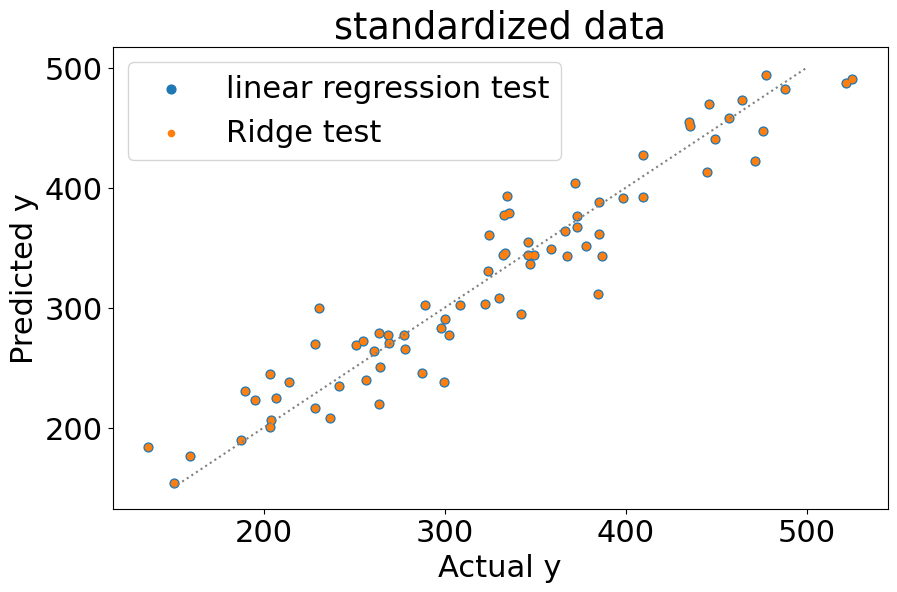

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(test_data_target, pipeline_lr.predict(test_data_features), s=40, label='linear regression test')
ax.scatter(test_data_target, pipeline_r.predict(test_data_features), s=20, label='Ridge test')
ax.plot([150,500],[150,500],':', color = 'grey')
ax.set_xlabel('Actual y')
ax.set_ylabel ( 'Predicted y')
ax.set_title('standardized data')
ax.legend()

There is no difference bewteen two model for the piplined models. Both ridge and linear regression model are standarlized. There is no difference between the linear regression model before standardization and after standardization. For the ridge model, data points now claustered aroung the fit line. So ridge model is being standardlized.